In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re

from scipy import stats
from datetime import datetime


In [2]:
df = pd.read_excel("date_python.xlsx",index_col="Numar Inregistrare")
print(df)

                               Tip unitate        Nume Unitate Tip categorie   
Numar Inregistrare                                                             
J12/1823/1991       PENSIUNE AGROTURISTICĂ           PĂSTRĂVUL   3 MARGARETE  \
J12/4339/1991       PENSIUNE AGROTURISTICĂ       CASA PETRU II       2 FLORI   
J12/4339/1991       PENSIUNE AGROTURISTICĂ   CASA PETRU STOLNA       2 FLORI   
J19/694/1992        PENSIUNE AGROTURISTICĂ                VARI   3 MARGARETE   
J33/765/1991        PENSIUNE AGROTURISTICĂ             LUCIANO       3 FLORI   
...                                    ...                 ...           ...   
J36/483/2006        PENSIUNE AGROTURISTICĂ             VASILIU       2 FLORI   
F38/394/2010        PENSIUNE AGROTURISTICĂ              ARNOTA       2 FLORI   
F38/709/2008        PENSIUNE AGROTURISTICĂ      CASA FILOXENIA       3 FLORI   
F38/532/2006        PENSIUNE AGROTURISTICĂ         STOICA ILIE       2 FLORI   
J/38/1264/1994      PENSIUNE AGROTURISTI

In [3]:
def median_profit(row):
    values = row[['Profit net 2021', 'Profit net 2020', 'Profit net 2019', 'Profit net 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['Profit_medie'] = df.apply(median_profit, axis=1)

In [31]:
def costuri_medie(row):
    values = row[['Numar mediu de angajați 2021', 'Numar mediu de angajați 2020', 'Numar mediu de angajați 2019', 'Numar mediu de angajați 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['Costuri_medie'] = df.apply(costuri_medie, axis=1)

C:\Users\Stan\AppData\Local\Temp\ipykernel_16828\1259711083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Costuri_medie'] = df.apply(costuri_medie, axis=1)


In [5]:
def median_fiscal_value(row):
    values = row[['Cifra de afaceri neta 2021', 'Cifra de afaceri neta 2020', 'Cifra de afaceri neta 2019', 'Cifra de afaceri neta 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['CA_medie'] = df.apply(median_fiscal_value, axis=1)

In [32]:
def nr_angaj_medie(row):
    values = row[['Numar mediu de angajați 2021', 'Numar mediu de angajați 2020', 'Numar mediu de angajați 2019', 'Numar mediu de angajați 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['Angajati_medie'] = df.apply(costuri_medie, axis=1)

C:\Users\Stan\AppData\Local\Temp\ipykernel_16828\3319771822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Angajati_medie'] = df.apply(costuri_medie, axis=1)


## Repartizarea pe tip de categorie

In [66]:
numar_pens_dupa_tip = df.groupby('Tip categorie').size().reset_index(name='Count')


In [67]:
df['Tip categorie'] = df['Tip categorie'].apply(lambda x: int(re.search(r'\d+', x).group()))
tip_categorie_count = df.groupby('Tip categorie').size().reset_index(name='count')

In [68]:
print(tip_categorie_count)

   Tip categorie  count
0              1     13
1              2    132
2              3    220
3              4     79
4              5     10


In [ ]:
grouped_profit = df.groupby('score')['profit'].mean()


In [27]:
print(tip_categorie_count)
tip_categorie_count.to_excel("Repartizarea pe tip categorie.xlsx")

   Tip categorie  count
0              1     13
1              2    132
2              3    220
3              4     79
4              5     10


## Corelatia dintre cifra de afaceri, profit, costuri si tipul de pensiune  


In [75]:
df.drop(df[(df['Tip categorie'] == 1) & (df['Profit_medie'] > 350)].index, inplace=True)


In [123]:
grouped_profit = df.groupby('Numar locuri')['CA_medie'].mean()

In [119]:
correlation = df['Numar locuri'].corr(df['Costuri_medie'])
print(correlation)

0.023046062744367105


In [124]:
print(grouped_profit)

Numar locuri
2     208.537250
4     277.378684
5     277.316233
6     205.188194
7     196.905864
8     135.290984
9     186.945781
10    184.023827
11    172.879100
12    180.775969
13    192.946500
14    258.869500
15    162.313833
16    194.097272
17    329.547300
18    119.345300
19    215.917750
20    190.845722
21    315.036000
23     40.448500
24    249.071000
26    315.036000
27    129.791000
29    261.095500
30    132.186000
31    227.432500
Name: CA_medie, dtype: float64


In [125]:
grouped_profit.to_excel('Corelatia dintre numar locuri si CA_medie.xlsx')

grouped_profit = df.groupby('Tip categorie')['CA_medie'].mean()

In [71]:
filtered_rows = df[df['Tip categorie'] == 1]

# Remove rows with 'profit' greater than 350
filtered_rows_no_outliers = filtered_rows[filtered_rows['Tip categorie'] <= 350]
grouped_profit = filtered_rows_no_outliers.groupby('Tip categorie')['Profit_medie'].mean()

In [72]:
print(grouped_profit)

Tip categorie
1    37.489615
Name: Profit_medie, dtype: float64


## Corelația dintre totalul număr spații si locuri cu profit

In [96]:
df['Numar spatii'] = np.where(df['Numar spatii'] > 8, 8, df['Numar spatii'])

In [104]:
numar_spatii_CA = df.groupby("Numar spatii")["CA"].mean().reset_index()


In [108]:
print(numar_spatii_CA)

   Numar spatii  Profit_medie
0             1     87.357750
1             2     41.673786
2             3     59.393991
3             4     60.210106
4             5     73.066326
5             6     76.132246
6             7     53.409641
7             8     82.419262


## Corelația cu date fiscale

In [127]:
tip_operator_eco_count = df.groupby('Tip Operator Economic').size().reset_index(name='count')
print(tip_operator_eco_count)

              Tip Operator Economic  count
0               Asociație Familială      5
1        Persoană Fizică Autorizată     17
2                  Persoană Fizică.     42
3  Societate cu Răspundere Limitată    359
4        Societate în Nume Colectiv      1
5           Întreprindere Familială      9
6         Întreprindere Individuală     21


In [129]:
tip_operator_eco_count.to_excel("repartizare dupa operator economic.xlsx")

In [133]:
tip_operator_eco__profit = df.groupby("Tip Operator Economic")["CA_medie"].mean().reset_index()
print(tip_operator_eco__profit)


              Tip Operator Economic    CA_medie
0               Asociație Familială  315.036000
1        Persoană Fizică Autorizată  315.036000
2                  Persoană Fizică.  315.036000
3  Societate cu Răspundere Limitată  160.049239
4        Societate în Nume Colectiv  315.036000
5           Întreprindere Familială  315.036000
6         Întreprindere Individuală  300.977143


In [23]:
# medie_CA_per_tip_categorie.to_excel('Media cifrei de afaceri per tip de categorie.xlsx')


In [25]:
# numar_pens_dupa_tip.to_excel('Numar de pensiuni in functie de tipul categoriei.xlsx')


In [30]:
# def is_valid_date(value):
#     try:
#         pd.to_datetime(value, dayfirst=True)
#         return True
#     except ValueError:
#         return False

# df['is_valid'] = df['Data Emitere Autorizatie'].apply(is_valid_date)


In [31]:
# print(df['is_valid'])

Numar Inregistrare
J12/1823/1991      True
J12/4339/1991     False
J12/4339/1991      True
J19/694/1992       True
J33/765/1991      False
                  ...  
J36/483/2006       True
F38/394/2010       True
F38/709/2008       True
F38/532/2006       True
J/38/1264/1994    False
Name: is_valid, Length: 454, dtype: bool


In [6]:
day_name_mapping = {
    'luni': 'monday',
    'marţi': 'tuesday',
    'miercuri': 'wednesday',
    'joi': 'thursday',
    'vineri': 'friday',
    'sâmbătă': 'saturday',
    'duminică': 'sunday'
}

# Custom function to parse and convert date strings to Unix time
def convert_to_unix_time(date_string):
    for romanian_day, english_day in day_name_mapping.items():
        date_string = date_string.replace(romanian_day, english_day)

    try:
        dt = pd.to_datetime(date_string, format='%A, %d %b, %Y', errors='coerce')
        if pd.isna(dt):
            dt = pd.to_datetime(date_string, format='%d.%m.%Y', errors='coerce')
        return int(dt.timestamp())
    except ValueError:
        return None

# Apply the custom function to the 'date_column' and create a new column 'unix_time'
df['unix_time'] = df['Data Emitere Autorizatie'].apply(convert_to_unix_time)

print(df)

                               Tip unitate        Nume Unitate Tip categorie   
Numar Inregistrare                                                             
J12/1823/1991       PENSIUNE AGROTURISTICĂ           PĂSTRĂVUL   3 MARGARETE  \
J12/4339/1991       PENSIUNE AGROTURISTICĂ       CASA PETRU II       2 FLORI   
J12/4339/1991       PENSIUNE AGROTURISTICĂ   CASA PETRU STOLNA       2 FLORI   
J19/694/1992        PENSIUNE AGROTURISTICĂ                VARI   3 MARGARETE   
J33/765/1991        PENSIUNE AGROTURISTICĂ             LUCIANO       3 FLORI   
...                                    ...                 ...           ...   
J36/483/2006        PENSIUNE AGROTURISTICĂ             VASILIU       2 FLORI   
F38/394/2010        PENSIUNE AGROTURISTICĂ              ARNOTA       2 FLORI   
F38/709/2008        PENSIUNE AGROTURISTICĂ      CASA FILOXENIA       3 FLORI   
F38/532/2006        PENSIUNE AGROTURISTICĂ         STOICA ILIE       2 FLORI   
J/38/1264/1994      PENSIUNE AGROTURISTI

In [4]:
# print(df['unix_time'])

Numar Inregistrare
J12/1823/1991     1.555286e+09
J12/4339/1991     1.505088e+09
J12/4339/1991     1.524701e+09
J19/694/1992      1.607990e+09
J33/765/1991      1.317168e+09
                      ...     
J36/483/2006      1.439165e+09
F38/394/2010      1.309738e+09
F38/709/2008      1.308701e+09
F38/532/2006      1.277424e+09
J/38/1264/1994             NaN
Name: unix_time, Length: 454, dtype: float64


In [7]:
# Find the largest and smallest Unix time values
largest_unix_time = df['unix_time'].max()
smallest_unix_time = df['unix_time'].min()

print("Largest Unix time:", largest_unix_time)
print("Smallest Unix time:", smallest_unix_time)


Largest Unix time: 1677715200.0
Smallest Unix time: 1247097600.0


In [6]:
# is_date_column = is_datetime(df['Data Emitere Autorizatie'])

# print(is_date_column)  # Output: True


False


In [7]:
# correlation = df['Tip categorie'].corr(df['CA_medie'])
# print(correlation)

KeyError: 'CA_medie'

In [8]:
reference_date = datetime.strptime("31.12.2021", "%d.%m.%Y")

# Recalculate the column
df["zile_de_la_deschiderea_afacerii"] = (int(reference_date.timestamp()) - df["unix_time"]) / 86400

# Check the number of negative values
negative_values_count = (df["zile_de_la_deschiderea_afacerii"] < 0).sum()
print("Number of negative values:", negative_values_count)

Number of negative values: 50


In [10]:
df = df.drop(df[df["zile_de_la_deschiderea_afacerii"] < 0].index)


In [162]:
print(count_below_zero)

0


In [20]:
df = df.drop(df[df["zile_de_la_deschiderea_afacerii"] < 0].index)

column_names = ['Profit_medie', 'zile_de_la_deschiderea_afacerii']
new_df = pd.DataFrame(df[column_names])
print(new_df)
new_df.to_excel("Corelatia dintre profit medie si zile de deschidere ale afacerii.xlsx")

                    Profit_medie  zile_de_la_deschiderea_afacerii
Numar Inregistrare                                               
J12/1823/1991            12.2140                       990.916667
J12/4339/1991             8.9605                      1571.916667
J12/4339/1991             8.9605                      1344.916667
J19/694/1992            319.2555                       380.916667
J33/765/1991            -19.7735                      3746.916667
...                          ...                              ...
J36/483/2006             50.2685                      2334.916667
F38/394/2010             50.2685                      3832.916667
F38/709/2008             50.2685                      3844.916667
F38/532/2006             50.2685                      4206.916667
J/38/1264/1994           50.2685                              NaN

[403 rows x 2 columns]


In [23]:
df = df.drop(df[df["Rata profitului net 2021"] < -100 | df["Rata profitului net 2021"] > 100 ].index)

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

In [22]:
mean_profit = df[['Rata profitului net 2021', 'Rata profitului net 2020', 'Rata profitului net 2019', 'Rata profitului net 2018']].mean()
print(mean_profit.mean())

-9.919026365112952


In [16]:
correlation = df['zile_de_la_deschiderea_afacerii'].corr(df['Costuri_medie'])
print(correlation)

-0.07325984305679474


## profit vs CA vs cheltuieli vs nr angajati

In [ ]:
df = df.query("-100 <= `Rata profitului net 2021` <= 100 and 0 -100 <= `Rata profitului net 2020` <= 100 and -100 <= `Rata profitului net 2019` <= 100 and -100 <= `Rata profitului net 2018` <= 100")


In [26]:
mean_profit = df[['Rata profitului net 2021', 'Rata profitului net 2020', 'Rata profitului net 2019', 'Rata profitului net 2018']].mean()
print(mean_profit.mean())

18.05051196172249


In [35]:
column_names = ['Profit_medie', 'CA_medie']
new_df = pd.DataFrame(df[column_names])
new_df.to_excel("Relatia intre profit si CA.xlsx")


In [36]:
correlation = df['Profit_medie'].corr(df['CA_medie'])
print(correlation)

-0.04423856065398684


In [27]:
mean_profit = df[['Profit net 2021', 'Profit net 2020', 'Profit net 2019', 'Profit net 2018']].mean()
print(mean_profit.mean())

102.91298790149838


In [14]:
# selected_columns = ['Rata profitului net 2021', 'Rata profitului net 2020', 'Rata profitului net 2019', 'Rata profitului net 2018']

# # Filter rows with a positive median and count them
# column_means  = df[selected_columns].mean(axis=0)
# print(column_means )

Rata profitului net 2021    21.488112
Rata profitului net 2020    24.228732
Rata profitului net 2019   -71.818497
Rata profitului net 2018     3.344859
dtype: float64


In [ ]:
# selected_columns = ['Rata profitului net 2021', 'Rata profitului net 2020', 'Rata profitului net 2019', 'Rata profitului net 2018']

# row_medians = df[selected_columns].median(axis=1)
# print()

In [15]:
# filtered_df = df[(df['Rata profitului net 2019'] >= -100) & (df['Rata profitului net 2019'] <= 100)]

# print(filtered_df)

                               Tip unitate       Nume Unitate Tip categorie   
Numar Inregistrare                                                            
J12/1823/1991       PENSIUNE AGROTURISTICĂ          PĂSTRĂVUL   3 MARGARETE  \
J12/4339/1991       PENSIUNE AGROTURISTICĂ      CASA PETRU II       2 FLORI   
J12/4339/1991       PENSIUNE AGROTURISTICĂ  CASA PETRU STOLNA       2 FLORI   
J19/694/1992        PENSIUNE AGROTURISTICĂ               VARI   3 MARGARETE   
J33/765/1991        PENSIUNE AGROTURISTICĂ            LUCIANO       3 FLORI   
...                                    ...                ...           ...   
J25/367/2018        PENSIUNE AGROTURISTICĂ      CASA SOARELUI   3 MARGARETE   
J12/4885/2018       PENSIUNE AGROTURISTICĂ          PĂDURICEA   3 MARGARETE   
J33/2050/2018       PENSIUNE AGROTURISTICĂ  FLOAREA BUCOVINEI   3 MARGARETE   
J33/1386/2019       PENSIUNE AGROTURISTICĂ       ARC BUCOVINA   3 MARGARETE   
J1/1425/2019        PENSIUNE AGROTURISTICĂ   CHEILE 

In [19]:
# selected_columns = ['Profit net 2021', 'Profit net 2020', 'Profit net 2019', 'Profit net 2018']
# row_medians = df[selected_columns].mean()

# # Filter rows with a positive median and count them
# print(row_medians)
# print('final median', row_medians.mean())

Profit net 2021     96.749740
Profit net 2020    129.649849
Profit net 2019     55.685640
Profit net 2018     45.169165
dtype: float64
final median 81.81359848174401


In [20]:
# row_medians.to_excel('Rata profitului mediu 2021-2018.xlsx')

In [58]:
# column_means = filtered_df[selected_columns].mean(axis=0)
# print(column_means)

# print(column_means.mean())

Rata profitului net 2021    18.631707
Rata profitului net 2020     7.471573
Rata profitului net 2019    14.848933
Rata profitului net 2018     4.108052
dtype: float64
11.265066445221445


In [55]:
# min = df['Rata profitului net 2019'].min()
# max = df['Rata profitului net 2019'].max()

# print("Minimum value in column '{}': {}".format(min, min))
# print("Minimum value in column '{}': {}".format(max, max))



Minimum value in column '-825.0': -825.0
Minimum value in column '526.0': 526.0


In [46]:
# overall_mean = column_means.mean()
# print(overall_mean)

-5.689198320488799


In [38]:
# correlation = df['zile_de_la_deschiderea_afacerii'].corr(df['CA_medie'])
# print(correlation)

0.0571100602399738


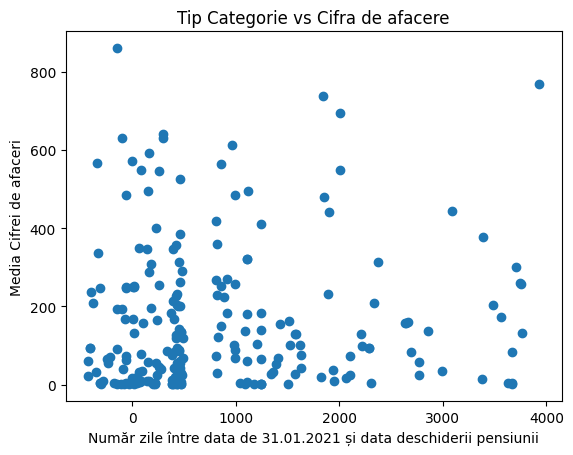

-0.009380359454780553


<Figure size 640x480 with 0 Axes>

In [40]:
# plt.scatter(df['zile_de_la_deschiderea_afacerii'], df['CA_medie'])

# # Set x and y axis labels
# plt.xlabel('Număr zile între data de 31.01.2021 și data deschiderii pensiunii')
# plt.ylabel('Media Cifrei de afaceri')

# # Set the title of the graph
# plt.title('Tip Categorie vs Cifra de afacere')
# plt.show()
# correlation = df['Tip categorie'].corr(df['Cheltuieli_medie'])
# plt.savefig("Grafic de dispersie între Număr zile între data de 31.01.2021 și data deschiderii pensiunii și Cifra de afaceri.png")

# print(correlation)

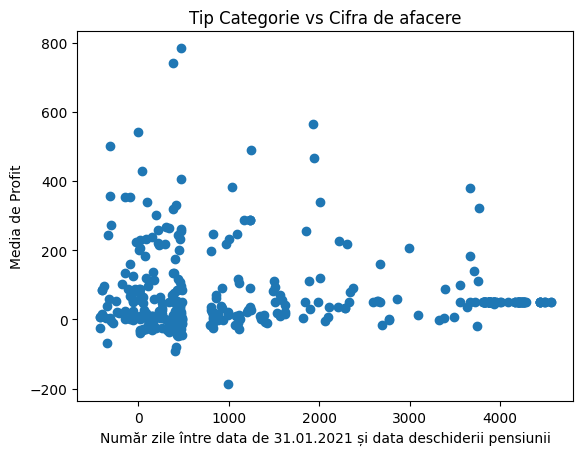

-0.009380359454780553


<Figure size 640x480 with 0 Axes>

In [41]:
# plt.scatter(df['zile_de_la_deschiderea_afacerii'], df['Profit_medie'])

# # Set x and y axis labels
# plt.xlabel('Număr zile între data de 31.01.2021 și data deschiderii pensiunii')
# plt.ylabel('Media de Profit')

# # Set the title of the graph
# plt.title('Tip Categorie vs Cifra de afacere')
# plt.show()
# correlation = df['Tip categorie'].corr(df['Cheltuieli_medie'])
# plt.savefig("Grafic de dispersie între Număr zile între data de 31.01.2021 și data deschiderii pensiunii și Media de profit.png")

# print(correlation)

In [42]:
# correlation = df['zile_de_la_deschiderea_afacerii'].corr(df['Profit_medie'])
# print(correlation)

-0.06962551054980945


In [23]:
df['Angajati_medie'] = df[["Numar mediu de angajați 2021", "Numar mediu de angajați 2020", "Numar mediu de angajați 2019", "Numar mediu de angajați 2018"]].apply(np.median, axis=1)


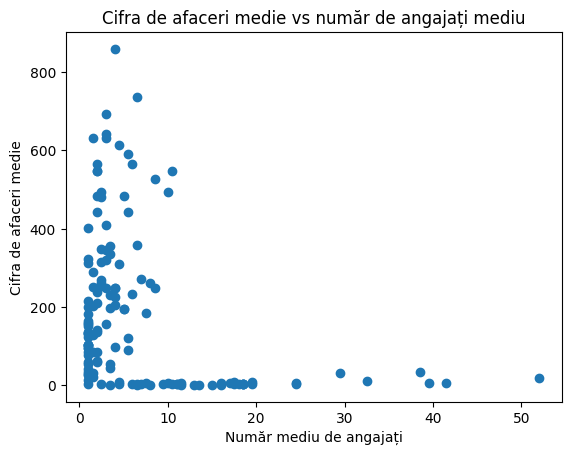

-0.33293127460225397


<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(df['Angajati_medie'], df['CA_medie'])

plt.xlabel('Număr mediu de angajați')
plt.ylabel('Cifra de afaceri medie')

# Set the title of the graph
plt.title('Cifra de afaceri medie vs număr de angajați mediu')
plt.show()
correlation = df['CA_medie'].corr(df['Angajati_medie'])
plt.savefig("Grafic de dispersie între Cifra de afaceri medie și numărul de angajați în medie")

print(correlation)

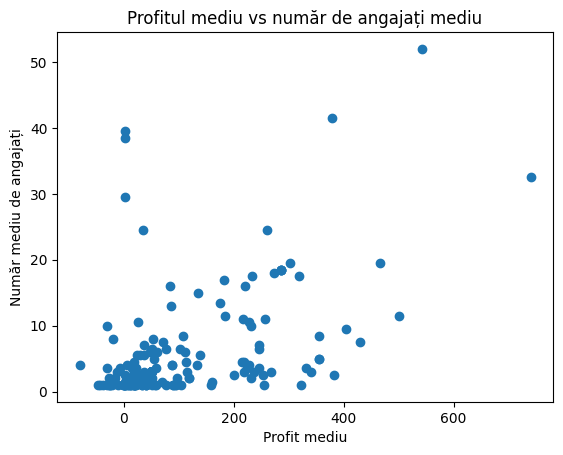

-0.33293127460225397


<Figure size 640x480 with 0 Axes>

In [33]:
plt.scatter(df['Profit_medie'], df['Angajati_medie'])

plt.xlabel('Profit mediu')
plt.ylabel('Număr mediu de angajați')

# Set the title of the graph
plt.title('Profitul mediu vs număr de angajați mediu')
plt.show()
correlation = df['CA_medie'].corr(df['Angajati_medie'])
plt.savefig("Grafic de dispersie între Profitul mediu și numărul de angajați în medie")

print(correlation)

In [37]:
selected_columns = ['Angajati_medie', 'Profit_medie']

# Create a new DataFrame with only the selected columns
selected_df = df[selected_columns].copy()  # Added .copy() to avoid SettingWithCopyWarning


# Calculate the profit per employee for each row
selected_df['Profit per employee'] = selected_df['Profit_medie'] / selected_df['Angajati_medie']

# Find the row with the highest profit per employee
optimal_row = selected_df.loc[selected_df['Profit per employee'].idxmax()]

# Extract the number of employees from that row
optimal_employees = optimal_row['Angajati_medie']
print(optimal_employees)

1.0


In [39]:
grouped_df = df.groupby('Angajati_medie')

# Calculate the average profit for each group
average_profits = grouped_df['Profit_medie'].mean()

# Find the group with the highest average profit
optimal_group = average_profits.idxmax()

print("Optimal number of employees for highest average profit:", optimal_group)

Optimal number of employees for highest average profit: 32.5


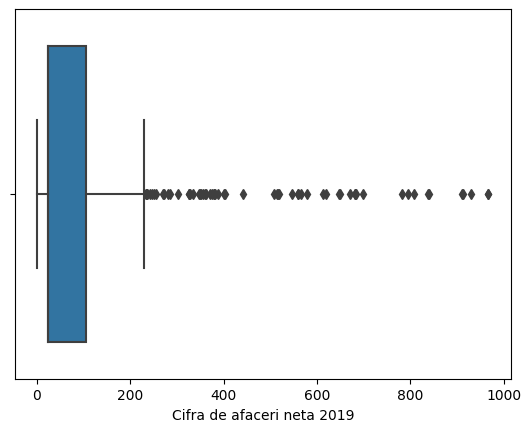

In [42]:
sns.boxplot(x=df['Cifra de afaceri neta 2019'])
plt.show()

In [40]:
selected_columns = ['Cifra de afaceri neta 2021', 'Cifra de afaceri neta 2020', 'Cifra de afaceri neta 2019', 'Cifra de afaceri neta 2018']
row_medians = df[selected_columns].mean()

# Filter rows with a positive median and count them
print(row_medians)
print('final median', row_medians.mean())

Cifra de afaceri neta 2021    211.353513
Cifra de afaceri neta 2020    232.267831
Cifra de afaceri neta 2019    114.916040
Cifra de afaceri neta 2018    154.015050
dtype: float64
final median 178.1381083261658


## Rata medie a modificarii cifrei de afaceri

In [46]:
profit_columns = ['Cifra de afaceri neta 2021', 'Cifra de afaceri neta 2020', 'Cifra de afaceri neta 2019', 'Cifra de afaceri neta 2018']
selected_df = df[profit_columns]

pct_change_df = selected_df.pct_change(axis=1)

# Calculate the average percentage change across the 4 columns
average_pct_change = pct_change_df.mean(axis=1)

# Calculate the overall average modification rate for all the rows
overall_average_modification_rate = average_pct_change.mean()

print("Overall average modification rate:", overall_average_modification_rate)

Overall average modification rate: 9.725098231678404


## Rata medie a modificarii profitului

In [47]:
profit_columns = ['Profit net 2021', 'Profit net 2020', 'Profit net 2019', 'Profit net 2018']
selected_df = df[profit_columns]

pct_change_df = selected_df.pct_change(axis=1)

# Calculate the average percentage change across the 4 columns
average_pct_change = pct_change_df.mean(axis=1)

# Calculate the overall average modification rate for all the rows
overall_average_modification_rate = average_pct_change.mean()

print("Overall average modification rate:", overall_average_modification_rate)

Overall average modification rate: 6.324007171247284


## Rata medie a modificarii costurilor

In [48]:
profit_columns = ['Cheltuieli totale 2021', 'Cheltuieli totale 2020', 'Cheltuieli totale 2019', 'Cheltuieli totale 2018']
selected_df = df[profit_columns]

pct_change_df = selected_df.pct_change(axis=1)

# Calculate the average percentage change across the 4 columns
average_pct_change = pct_change_df.mean(axis=1)

# Calculate the overall average modification rate for all the rows
overall_average_modification_rate = average_pct_change.mean()

print("Overall average modification rate:", overall_average_modification_rate)

Overall average modification rate: 8.873954648008949


## Numarul de pensiuni agroturistice cu profit medie in pierdere per judet

In [51]:
negative_profit_df = df[df['Profit_medie'] < 0]

# Group the filtered DataFrame by the "Judet" column
grouped_df = negative_profit_df.groupby('Judet')

# Count the number of occurrences for each "Judet" value
judet_counts = grouped_df.size()

print("Number of occurrences for each 'Judet' value with a negative profit:")
print(judet_counts)
judet_counts.to_excel('Numarul de pensiuni agroturistice cu profit medie in pierdere per judet.xlsx')

Number of occurrences for each 'Judet' value with a negative profit:
Judet
Alba                2
Arad                1
Argeș               2
Bihor               2
Bistrița-Năsăud     4
Brașov              2
Buzău               1
Cluj               10
Covasna             2
Dolj                2
Gorj                2
Harghita            4
Hunedoara           2
Maramureș           4
Mehedinți           1
Neamț               2
Satu Mare           2
Sibiu               1
Suceava             2
Sălaj               4
Tulcea              8
dtype: int64


## Impartire per tip operator economic

In [61]:
def median_fiscal_value(row):
    values = row[['Cifra de afaceri neta 2021', 'Cifra de afaceri neta 2020', 'Cifra de afaceri neta 2019', 'Cifra de afaceri neta 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['CA_medie'] = df.apply(median_fiscal_value, axis=1)

In [72]:
grouped_df = df.groupby('Tip Operator Economic')

# Count the number of occurrences for each "Judet" value
tip_operator_df = grouped_df.size()
print(tip_operator_df)
tip_operator_df.to_excel('Impartire în funcție de tipul de oprator economic.xlsx')

Tip Operator Economic
Asociație Familială                   5
Persoană Fizică Autorizată           17
Persoană Fizică.                     42
Societate cu Răspundere Limitată    359
Societate în Nume Colectiv            1
Întreprindere Familială               9
Întreprindere Individuală            21
dtype: int64


In [66]:
unique_ca = df['CA_medie'].unique()
print(unique_ca)

[ 88.049   27.7855   2.9935 261.0955 443.1685   5.35     2.334    2.146
 441.94    21.4765  11.323       nan 349.234    3.9055   4.8795 359.067
   4.622    5.8665 248.223  120.1615   1.1175   1.155    3.19    32.1255
 168.1625 548.346    6.2315  92.33   150.275    7.6005   9.0255   1.331
 159.8135  90.4945 495.005  335.401  155.2    132.186    2.1785  35.4985
   2.6595   8.761   43.076  400.596   35.873   53.047   18.06   247.308
 141.831  590.964   66.272  296.2145 183.3485 204.2645   2.562   19.4255
  56.097  313.4505   2.8845 768.127  565.694  256.3185 157.8295  72.3155
 130.998    4.834   83.6825 301.644  136.2315 376.618  156.494  641.171
  31.486  214.8095 270.7385  32.638  174.163  168.6135 737.5525  52.2185
  18.97     8.282   85.518  122.834   46.143    2.4755 630.643  254.754
  94.309  257.0485 309.206   16.7025  34.7325 321.366    1.424  232.162
  87.3425 261.3215  44.478  208.3825  50.252   85.3285  68.461   20.339
  96.871  859.929    6.696  321.2875 129.385  564.677  237.

In [71]:
grouped_df = df.groupby('Tip Operator Economic')

# Calculate the median profit for each group
median_ca_by_company_name = grouped_df['CA_medie'].mean()

print(median_ca_by_company_name)
median_ca_by_company_name.to_excel('Cifra de afaceri medie în funcție de tipul operatorului economic.xlsx')


Tip Operator Economic
Asociație Familială                 315.036000
Persoană Fizică Autorizată          315.036000
Persoană Fizică.                    315.036000
Societate cu Răspundere Limitată    160.049239
Societate în Nume Colectiv          315.036000
Întreprindere Familială             315.036000
Întreprindere Individuală           300.977143
Name: CA_medie, dtype: float64


## Corelatie intre profit si numar angajati 

In [33]:
correlation = df['Angajati_medie'].corr(df['CA_medie'])
print(correlation)

-0.1703813942992964
